**Проверка гипотез по увеличению выручки в интернет-магазине - оценить результаты А/В теста**

    Приоритизировать гипотезы для увеличения выручки, запустить A/B-тест и проанализировать результаты.
     
    
   **Данные для первой части**
    Файл /datasets/hypothesis.csv. 
    
    Hypothesis — краткое описание гипотезы;
    Reach — охват пользователей по 10-балльной шкале;
    Impact — влияние на пользователей по 10-балльной шкале;
    Confidence — уверенность в гипотезе по 10-балльной шкале;
    Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

   **Данные для второй части**
    Файл /datasets/orders.csv. 

    transactionId — идентификатор заказа;
    visitorId — идентификатор пользователя, совершившего заказ;
    date — дата, когда был совершён заказ;
    revenue — выручка заказа;
    group — группа A/B-теста, в которую попал заказ.

   Файл /datasets/visitors.csv. 

    date — дата;
    group — группа A/B-теста;
    visitors — количество пользователей в указанную дату в указанной группе A/B-теста
    
   **Шаги по выполнению проекта**
   
   **Часть 1. Приоритизация гипотез.**
   
В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

**Задача**

    1.1. Загрузить данные и подготовить их к анализу. Выполнить предобработку.
    1.2. Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
    1.3. Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
    1.4. Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

   **Часть 2. Анализ A/B-теста**
Есть проведенный A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

**Задача**

Проанализировать A/B-тест:

    2.1. Построить график кумулятивной выручки по группам. Сделать выводы и предположения.
    2.2. Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.
    2.3. Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.
    2.4. Построить график кумулятивного среднего количества заказов по группам. Сделать выводы и предположения.
    2.5. Построить график относительного изменения кумулятивного среднего количества заказов группы B к группе A. Сделать выводы и предположения.
    2.6. Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.
    2.7. Построить 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
    2.8. Построить точечный график стоимостей заказов. Сделать выводы и предположения.
    2.9. Построить 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.
    2.10. Построить статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным. Сделать выводы и предположения.
    2.11. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
    2.12. Посчитать статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным. Сделать выводы и предположения.
    2.13. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.
    2.14. Принять решение по результатам теста и объяснить его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

**ШАГ 1.Приоритизация гипотез**

**1.1 Загрузить данные и подготовить их к анализу. Выполнить предобработку.**

**Изучение общей информации таблица hypothesis**

In [91]:
import pandas as pd
import scipy.stats as stats
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import math as mth
import datetime as dt

In [92]:
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
except:
    hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')

In [93]:
hypothesis.head(10)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [94]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [95]:
hypothesis.duplicated().sum()

0

In [96]:
hypothesis.isna().sum()

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

**Вывод**

      В таблицах не обнаружено дубликатов и пропущенных значений. Типы данных находятся в соответствии со значениями

**Предобработка данных таблица hypothesis**

Заменим названия столбцов (приведем к нижнему регистру)

In [97]:
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis.head()

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


**Вывод** 

    Заменили названия столбцов. Привели к нижнему регистру.

**1.2. Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.**

In [98]:
hypothesis['ICE'] =  hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']
hypothesis_new = hypothesis.sort_values(by='ICE', ascending=False)
pd.options.display.max_colwidth = 120
print(hypothesis_new)

                                                                                                     hypothesis  \
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользоват

**1.3. Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.**

In [99]:
hypothesis['RICE'] = (hypothesis['reach']*hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']
hypothesis_new = hypothesis.sort_values(by='RICE', ascending=False)
pd.options.display.max_colwidth = 120
print(hypothesis_new)

                                                                                                     hypothesis  \
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позвол

**1.4. Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.**


    Наиболее перспективные гипотезы по ICE: 
    8 - Запустить акцию, дающую скидку на товар в день рождения, 
    0 -  Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей, 
    7 -  Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок, 
    6 - Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию. 
    
    Наиболее перспективные гипотезы по RICE: 
    7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок, 
    2 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа, 
    0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей, 
    6 - Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию. 
   
    Во втором случае, гипотеза 7 на первом месте, так как парметр reach - 10, то есть наибольший параметр, затрагивающий пользователей. Отличия в приеоритатах продиктованы, тем что в фреймворке RICE мы учитываем - Reach (скольких пользователей затронет изменение, которое мы хотим внести), и в гипотезах 7 и 2 он очень высок (в 7 он =10 - максимальный. А в 2 он =8,то есть тоже высокий, а в лидере ICE - в 8 он минимальный =1). В связи с этим, надо предложить для тестирования гипотезу № 7 и, возможно, №2.

**Часть 2. Анализ A/B-теста** Есть проведенный A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

**Предобработка данных для таблиц visitors и orders**

**Изучение общей информации**

In [100]:
try:
    orders = pd.read_csv('/datasets/orders.csv')
except:
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
try:
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')

In [101]:
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [102]:
visitors.head(5)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [103]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [104]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [105]:
orders.duplicated().sum()

0

In [106]:
visitors.duplicated().sum()

0

In [107]:
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [108]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

**Поменяем тип столбца "date" на datetime**

In [109]:
orders["date"] = pd.to_datetime(orders['date'])
visitors["date"] = pd.to_datetime(visitors['date'])
orders.info()
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


**Вывод**

  В таблицах не обнаружено дубликатов и пропущенных значений. Типы данных находятся в соответствии со значениями. В процессе предобработки был поменян только тип столбца "date" на datetime.

**2.1. Построим график кумулятивной выручки по группам. Сделать выводы и предположения.**

Рассчитаем усредненную (медианную) выручку за день в каждой группе, чтобы иметь представление сколько выручка за день

In [110]:
orders.groupby(['date','group'])['revenue'].sum().groupby('group').median()

group
A    112473
B    147274
Name: revenue, dtype: int64

Сравним идентичны ли даты и группы в таблицах посетителей и заказов 

In [111]:
orders[['date','group']].drop_duplicates().sort_values(by=['date','group']).reset_index(drop=True)

,date,group
0,2019-08-01,A
1,2019-08-01,B
2,2019-08-02,A
3,2019-08-02,B
4,2019-08-03,A
...,...,...
57,2019-08-29,B
58,2019-08-30,A
59,2019-08-30,B
60,2019-08-31,A


In [112]:
visitors[['date','group']].drop_duplicates().sort_values(by=['date','group']).reset_index(drop=True)

,date,group
0,2019-08-01,A
1,2019-08-01,B
2,2019-08-02,A
3,2019-08-02,B
4,2019-08-03,A
...,...,...
57,2019-08-29,B
58,2019-08-30,A
59,2019-08-30,B
60,2019-08-31,A


In [113]:
compare_dg = orders[['date','group']].drop_duplicates().sort_values(by=['date','group']).reset_index(drop=True) == \
                        visitors[['date','group']].drop_duplicates().sort_values(by=['date','group']).reset_index(drop=True)

compare_dg['date'].sum() , compare_dg['group'].sum()

(62, 62)

**Вывод** Все пары совпадают.


Создаю таблицу cumulativeData

In [114]:
datesGroups = orders[['date','group']].drop_duplicates()

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]. \
                                     agg({'date' : 'max', 
                                          'group' : 'max', 
                                          'transactionId' : pd.Series.nunique, 
                                          'visitorId' : pd.Series.nunique, 
                                          'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]. \
                                       agg({'date' : 'max', 
                                            'group' : 'max', 
                                            'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Построю график кумулятивной выручки для обеих групп

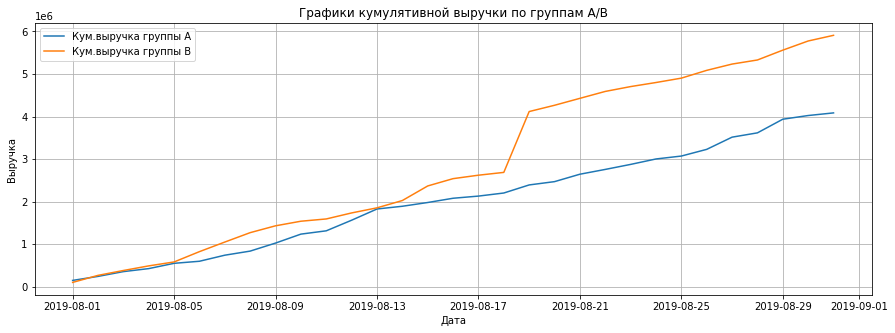

In [115]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders', 'visitors']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders', 'visitors']]

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='Кум.выручка группы A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='Кум.выручка группы B')
plt.grid()
plt.legend()
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.title('Графики кумулятивной выручки по группам A/B')
plt.show()

**2.1. Вывод** 

      Выручка в группе В в первой половине месяца растет незначительно быстрее, чем в группе А. До 13.08 выручки примерно равны, а после 17.08 группа В становится лидером, её выручка становится значительно выше. Можно предположить, что резкий всплекс выручки в группе В мог быть вызван большим заказом. В дальнейшем исследовании это надо учитывать.

**2.2. Построить график кумулятивного среднего чека по группам.**

Для построения графики среднего кумулятивного чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:

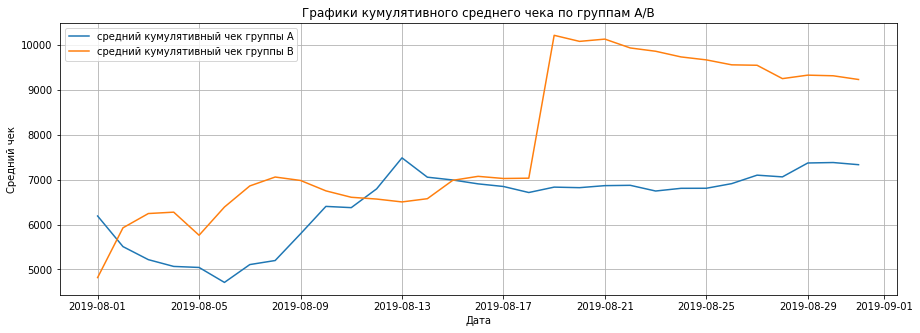

In [116]:
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='средний кумулятивный чек группы A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='средний кумулятивный чек группы B')
plt.legend()
plt.ylabel('Средний чек')
plt.xlabel('Дата')
plt.title('Графики кумулятивного среднего чека по группам A/B')
plt.show()

**2.2. Вывод** 

    Здесь мы видим схожесть с предыдущим графиком. То есть в первой половине месяца групппы А и В схожи и лидируют по общему чеку по очереди. После 17 августа группа В имеет средний чек значительно выше группы А и к концу месяца постепенно снижается.

**2.3. Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.**

Для этого нам понадобиться собирать данные в одном датафрейме и потом построить график относительного изменения кумулятивного среднего чека групп

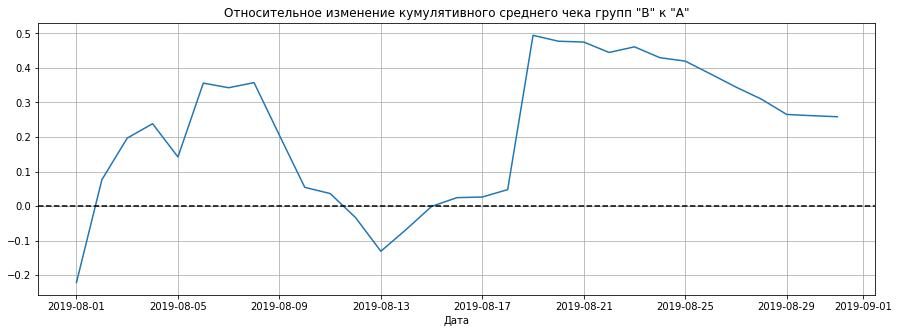

In [117]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15,5))
plt.grid()
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/ \
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('Относительное изменение кумулятивного среднего чека групп "B" к "А"')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Дата')
plt.show()


**2.3. Вывод** 

    В данном случае можно сделать похожий вывод, как с предыдущим графиком. Средий чек для группы В шел в рост равномерно до 7-8 августа, потом немного снизился, а после 17 августа всплеск и был значительно больше А - до конца месяца. К концу месяца видно равномерное снижение среднего чека. 

**2.4. Построить график кумулятивного среднего количества заказов по группам.**

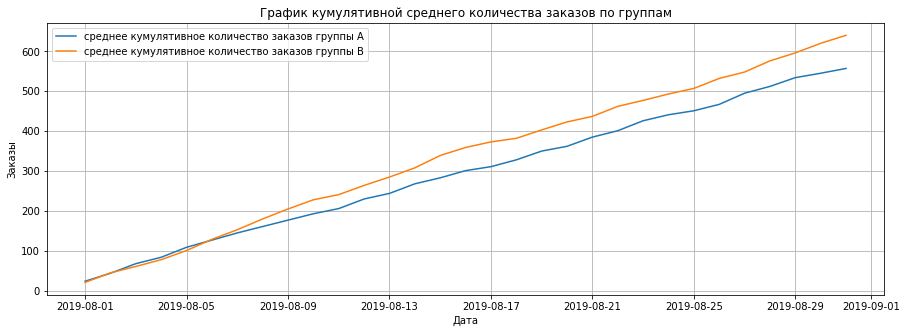

In [118]:


plt.figure(figsize=(15,5))
plt.grid()
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['orders'], label='среднее кумулятивное количество заказов группы A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['orders'], label='среднее кумулятивное количество заказов группы B')
plt.legend()
plt.title('График кумулятивной среднего количества заказов по группам')
plt.xlabel('Дата')
plt.ylabel('Заказы')
plt.show()

**2.4. Вывод** 

    Среднее кумулятивное количество заказов в группе В выше, в группе А - ниже.

**2.5. Построить график относительного изменения кумулятивного среднего количества заказов группы B к группе A.**

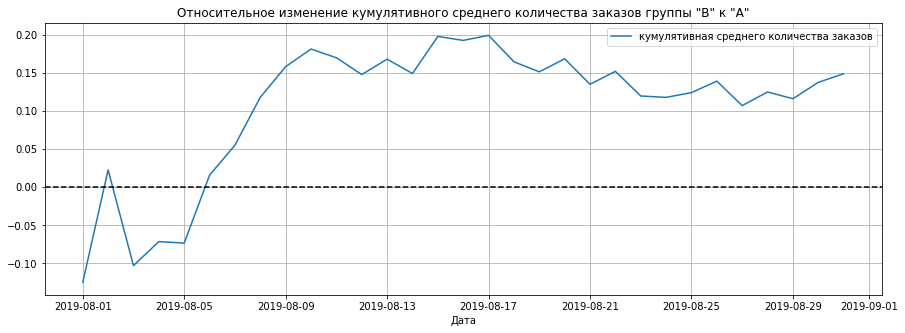

In [119]:

cumulativeData['order'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeOrder=cumulativeRevenueA[['date', 'orders']].merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15,5))
plt.grid()
plt.plot(cumulativeOrder['date'],cumulativeOrder['ordersB']/cumulativeOrder['ordersA']-1, label='кумулятивная среднего количества заказов')
plt.title('Относительное изменение кумулятивного среднего количества заказов группы "B" к "А"')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Дата')
plt.legend()
plt.show()


**2.5. Вывод** 

    Судя по графику, для группы В характерно повышение среднего количества заказов после 6.08, график стабильно больше до конца месяца, немного уменьшается после 17.08. Группа А наоборот, имеет плюс до 6.08, а затем заказов становится значительно меньше, чем в группе В. Разница достигает 20% на максимуме.

**2.6. Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.**

In [120]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False). \
                                                                        agg({'transactionId' : pd.Series.nunique})

ordersByUsers.columns = ['user_id','orders']

ordersByUsers.sort_values(by='orders',ascending=False).head(10)

,user_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


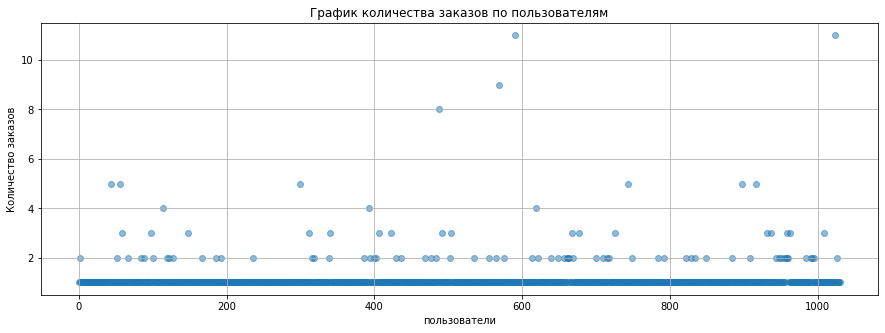

In [121]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(15,5))
plt.grid()
plt.title('График количества заказов по пользователям')
plt.xlabel('пользователи')
plt.ylabel('Количество заказов')
plt.scatter(x_values, ordersByUsers['orders'], alpha=0.5)
plt.show()

**2.6. Вывод** 

      Больше всего пользователей совершили по одному заказу, потом идут те, кто сделал два заказа. Скорее всего то, что выше 3-4 заказов можно считать аномалией.

**2.7. Построить 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.**

In [122]:
print('Рассчитаем 95 и 99 перцентили по заказам : ', np.percentile(ordersByUsers['orders'], [95, 99])) 

Рассчитаем 95 и 99 перцентили по заказам :  [2. 4.]


**2.7. Вывод**

    Большинство пользователей делают 1-2 заказа, соответственно, всё, там где больше двух заказов - можно считать аномалией.

**2.8. Построить точечный график стоимостей заказов. Сделать выводы и предположения.**

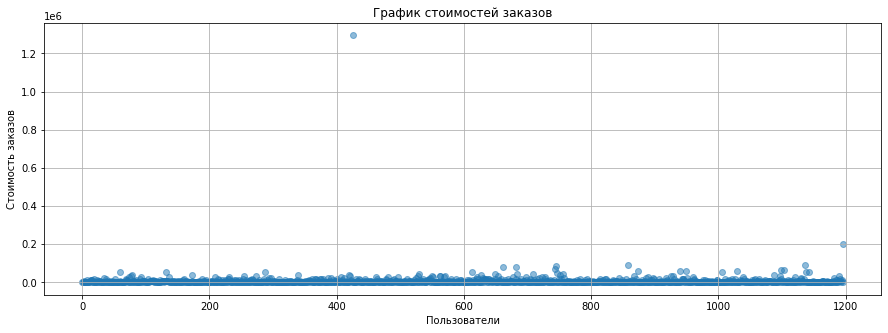

In [123]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15,5))
plt.grid()
plt.title('График стоимостей заказов')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказов')
plt.scatter(x_values, orders['revenue'], alpha=0.5)
plt.show()

Для построения более наглядного графика, уберем аномальные значения.

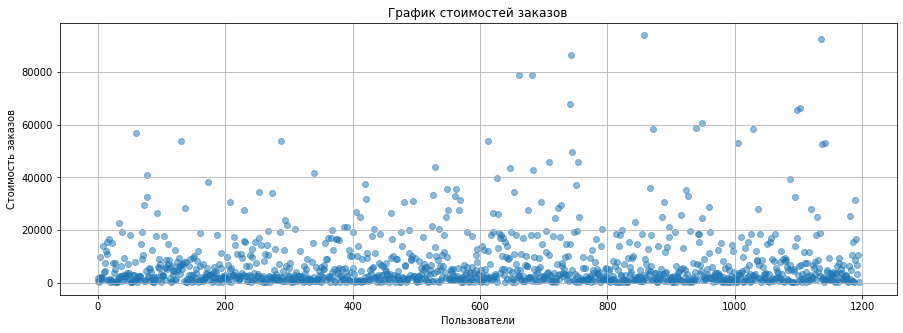

In [124]:
norm_orders = orders[orders['revenue']<=195000]['revenue']
xn_values = pd.Series(range(0,len(norm_orders)))
plt.figure(figsize=(15,5))
plt.grid()
plt.title('График стоимостей заказов')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказов')
plt.scatter(xn_values, norm_orders, alpha=0.5)
plt.show()

**2.8. Вывод**

    На первом графике выделяются два аномальных заказа: один - около 1.2 млн, второй на 200 тысяч. На втоом графике видно, что основная часть заказов, как правило, не более 100 тысяч.

**2.9. Построить 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.**

In [125]:
print('Рассчитаем 95 и 99 перцентили по выручке заказов : ', np.percentile(orders['revenue'], [95, 99]))

Рассчитаем 95 и 99 перцентили по выручке заказов :  [28000.  58233.2]


**2.9. Вывод**

     Здесь мы видим, что 99% заказов меньше суммы 58233.2. Эту сумму установим как границу аномальных значений.

**2.10. Построить статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным. Сделать выводы и предположения.**

In [126]:
visitors.head(2)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619


In [127]:
orders.head(2)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B


Подготовим данные к анализу

In [141]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId':'nunique'})
ordersByUsersA.columns = ['visitorId', 'orders']
ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId':'nunique'})
ordersByUsersB.columns = ['visitorId', 'orders']

    Далее Объявим переменные sampleA  и sampleB, в них пользователям с заками будут соответствовать число заказов пользователя, нулями будет отмечено отсутсвие заказов, то есть ноль.

    Далее посчитаю статистическую значимость различия среднего количества заказов, с применением теста Манна-Уитни.

    Выведу p-value для сравнения среднего между группами. (округление p-value до 3 знаков после запятой). Затем вычислю и выведу относительное различие в среднем между группами. (округление до 3 знаков после запятой).

    За нулевую гипотезу возьмём что: "статистически значимых различий в количестве числа заказов между группами нет"; тогда альтернативная гипотеза будет гласить - статистически значимые различия есть.

In [142]:

list_orders_1 =[]
for i in range(0,(visitors[visitors['group']=='A']['visitors'].sum()-len(ordersByUsersA))):
    list_orders_1.append(0)
orders_by_non_purchased_users_A = pd.Series(data = list_orders_1, name = 'orders')

list_orders_2 =[]
for i in range(0,(visitors[visitors['group']=='B']['visitors'].sum()-len(ordersByUsersB))):
    list_orders_2.append(0)
orders_by_non_purchased_users_B = pd.Series(data = list_orders_2, name = 'orders')

sampleA = pd.concat([ordersByUsersA['orders'], orders_by_non_purchased_users_A], axis=0)
sampleB = pd.concat([ordersByUsersB['orders'], orders_by_non_purchased_users_B], axis=0)

print("alpha =",0.05)
print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB, alternative = 'two-sided')[1]))
print('Относительный прирост в среднем количестве заказов группы B по отношению к группе A: {:.3f}'.format(sampleB.mean()/sampleA.mean()-1))
alpha = 0.05
results = stats.mannwhitneyu(sampleA, sampleB)


alpha = 0.05
p-value = 0.017
Относительный прирост в среднем количестве заказов группы B по отношению к группе A: 0.138


**2.10. Вывод**

    Р-value сильно меньше 0.05, по-этому нулевую гипотезу отвергаем. Анализ "сырых" данных говорит о том, что в среднем количестве заказов по группам есть статистически значимые различия. А относительный прирост среднего гуппы В к конверсии группы А равен 13.8%.

**2.11. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.**

    Для того, чтобы посчитать статистическую значимость различия средних чеков между группами, выведу p-value для сравнения средних чеков между группами. (округление p-value до трёх знаков после запятой). А так же посчитаю относительный прирост среднего чека группы B, округлив до трёх знаков после запятой.

In [143]:
print("alpha =",0.05)
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

alpha = 0.05
p-value = 0.729
Относительный показатель 'B' и 'A' = 0.259


**2.11.  Вывод** 
 
     В данном случае p-value намного больше 0.05, что позволяет нам не отвергать нулевую гипотезу. Средние чеки по "сырым" данным схожи, при этом средний чек группы В выше, чем средний чек группы А - на 25.9%. Что может указывать на влияние выбросов на метрику.

**2.12. Посчитать статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным. Сделать выводы и предположения.**

Для того, чтобы посчитать статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным, возьмем критерии из предыдущих вычислений. Сделаем срез данных, где число пользователей больше или равно 2, и пользователей, которые совершили заказ на сумму более 58233.2.

In [162]:
limit_orders = 2
limit_orders_revenue = 58233.2

usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > limit_orders]['visitorId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > limit_orders_revenue]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print("Пользователи с заказом на сумму более 58233.2 =" ,len(abnormalUsers)) 

1099    148427295
18      199603092
23      237748145
37      249864742
68      457167155
Name: visitorId, dtype: int64
Пользователи с заказом на сумму более 58233.2 = 31


 Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [157]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

#visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]. \
                                        #    agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
#visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

#visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]. \
                                      #      agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
#visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']


data = visitorsBDaily.merge(visitorsADaily, left_on='date', right_on='date', how='left')
data.sample(3)




sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'], \
                             pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), \
                                       name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'], \
                             pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), \
                                       name='orders')],axis=0) 

Далее за нулевую гипотезу примем: "статистически значимых различий в конверсии между группами нет"; тогда альтернативная гипотеза будет гласить - статистически значимые различия есть. Применю статистический критерий Манна-Уитни к полученным выборкам.

In [158]:
print("alpha =",0.05)
print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative = 'two-sided')[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

alpha = 0.05
p-value = 0.010
Относительный показатель 'B' и 'A' = 0.174


**Вывод**

    Р-value менее 0.05, что позволяет говорить о том, что статистически значимых различий между группами нет, значит гипотезу - отвергаем. Соответственно, по "очищенным" данным различия между группами есть. Относительный показатель вырос по "очищенным" данным до 17.4%.

**2.13. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.**

Для определения различий в среднем чеке заказа между группами по «очищенным» данным, приму за нулевую гипотезу: "статистически значимых различий в средних чеках между группами нет"; тогда альтернативная гипотеза будет гласить - статистически значимые различия есть. Воспользуюсь так же критерием Манна-Уитни. Округление значений проедем до трех знаков.

In [159]:
print("alpha =",0.05)
print("p-value = {0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'], alternative = 'two-sided')[1]))

print("Относительный показатель 'B' и 'A' = {0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 

alpha = 0.05
p-value = 0.798
Относительный показатель 'B' и 'A' = -0.020


**Вывод**

    Мы видим, что p-value значительно выше 0.05. Следовательно, нулевую гипотезу не отвергаем, а значит различия в среднем чеке есть. По относительному показателю видно, что средний чек группы В на 2 % меньше, чем в группе А. А по "сырым" данным этот показатель был выше в группе В на 26%, чем в группе А. То есть на средний чек очень сильно повлияли аномальные заказы на 1,2 млн и на 200 тысяч.

**2.14. Принять решение по результатам теста и объяснить его.** 

    Варианты решений: 
    1. Остановить тест, зафиксировать победу одной из групп. 
    2. Остановить тест, зафиксировать отсутствие различий между группами. 
    3. Продолжить тест.

**По результатам А/В тестирования были сделаны выводы:**
    
     - По "сырым" и по "очищенным" данным различия между группамии В и А присутствует. Относительный показатель разницы группы В над А составил по "очищенным" данным - 17.4%, по "сырым" данным - 13.8%.
     - По средним чекам, при очистке данных от аномальных покупок (в 1,2 млн и 200 тысяч, соответственно), выяснилось, что В и А группы примерно одинаковы (средний чек в группе В незначительно ниже среднего чека в группе А - на 2%).
     
     
   **В данном случае, можно остановить тестирование и признать, что группа В эффективнее группы А.**